# Deep ChatGPT

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_copom = pd.read_csv('df_copom.csv')

In [3]:
df_copom.head()

,Date,Selic,Meeting_Number,Decision,Decision_txt,Text,Type
0,2006/03/08,16.50,117.0,-0.75,decrease,"In the March Meeting, the Banco Central do Br...",Statement
1,2006/04/19,15.75,118.0,-0.75,decrease,"In the April Meeting, the Monetary Policy Com...",Statement
2,2006/05/31,15.25,119.0,-0.50,decrease,"In the May Meeting, the Monetary Policy Commi...",Statement
3,2006/07/19,14.75,120.0,-0.50,decrease,"In the July Meeting, the Copom unanimously de...",Statement
4,2006/08/30,14.25,121.0,-0.50,decrease,"In the August Meeting, the Copom unanimously ...",Statement


In [14]:
texts = df_copom['Text'].tolist()
labels = df_copom['Decision_txt'].tolist()

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to have the same length
max_seq_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)

# Convert labels to one-hot encoded vectors
label_classes = list(set(labels))
num_classes = len(label_classes)

label_to_index = {label: index for index, label in enumerate(label_classes)}
index_to_label = {index: label for label, index in label_to_index.items()}

labels_encoded = np.array([label_to_index[label] for label in labels])
labels_one_hot = np.eye(num_classes)[labels_encoded]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels_one_hot, test_size=0.2)

# Build the model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_seq_length))
model.add(LSTM(100))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [32]:
# Train the model
# model.fit(X_train, y_train, epochs=40, batch_size=16)
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_test, y_test))

Train on 127 samples, validate on 32 samples
Epoch 1/40
127/127 [==============================] - 11s 83ms/step - loss: 1.0993 - accuracy: 0.2992 - val_loss: 1.0930 - val_accuracy: 0.3750
Epoch 2/40
127/127 [==============================] - 10s 81ms/step - loss: 1.0872 - accuracy: 0.3937 - val_loss: 1.0899 - val_accuracy: 0.3438
Epoch 3/40
127/127 [==============================] - 10s 81ms/step - loss: 1.0734 - accuracy: 0.3780 - val_loss: 1.0707 - val_accuracy: 0.3438
Epoch 4/40
127/127 [==============================] - 10s 79ms/step - loss: 1.0528 - accuracy: 0.4252 - val_loss: 0.9589 - val_accuracy: 0.5312
Epoch 5/40
127/127 [==============================] - 10s 79ms/step - loss: 0.9842 - accuracy: 0.5354 - val_loss: 0.9856 - val_accuracy: 0.4688
Epoch 6/40
127/127 [==============================] - 10s 79ms/step - loss: 0.9322 - accuracy: 0.5354 - val_loss: 0.8551 - val_accuracy: 0.5938
Epoch 7/40
127/127 [==============================] - 10s 79ms/step - loss: 0.8706 - accura

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

32/32 [==============================] - 3s 81ms/step
Test loss: 2.467297077178955
Test accuracy: 0.53125


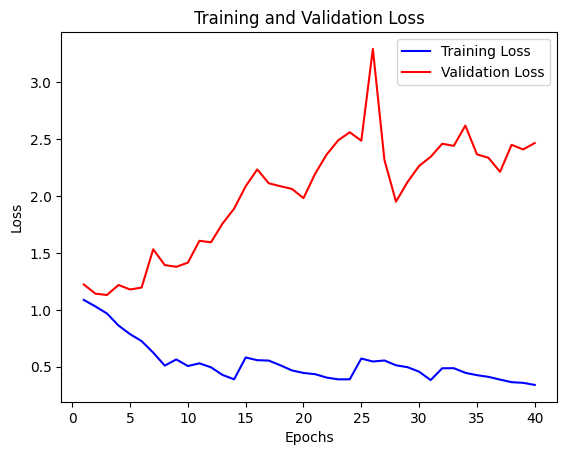

In [30]:
import matplotlib.pyplot as plt

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss values
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
# Predict on new central bank texts
new_texts = ['The central bank announced a change in interest rates.',
             'The monetary policy committee held its monthly meeting.']

new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_seq_length)

predictions = model.predict(new_padded_sequences)
predicted_labels = [index_to_label[np.argmax(pred)] for pred in predictions]

print('New Texts Predictions:', predicted_labels)

New Texts Predictions: ['decrease', 'decrease']
